# Resources on Stochastic Gradient Descent

from GFG :

[Stochastic Gradient Descent:](https://www.geeksforgeeks.org/machine-learning/ml-stochastic-gradient-descent-sgd/)

And a Medium article :

[Stochastic Gradient Descent:](https://mohitmishra786687.medium.com/stochastic-gradient-descent-a-basic-explanation-cbddc63f08e0)

# Question 1


How does the learning rate affect the convergence of Stochastic Gradient Descent, and what are some common strategies for choosing or adapting the learning rate during training?


The learning rate is widely considered the most critical hyperparameter in Stochastic Gradient Descent . It acts as the step size for the algorithm's updates. Because SGD estimates the gradient using only a single example or a small batch at a time, the updates are noisy and erratic. The learning rate controls how strictly the model reacts to this noisy signal.
1. The impact of the learning rate ($\eta$) on convergence determines the speed, stability, and final accuracy of the model.
If the Learning Rate is Too High:Overshooting & Divergence: The model takes steps that are too large, jumping completely over the minimum. In extreme cases, the error can explode (diverge) rather than decrease.Oscillation: The model may reach the general vicinity of the optimal solution but fail to settle, bouncing back and forth around the minimum indefinitely.Poor Generalization: While a high initial rate can help escape sharp local minima (finding flatter, more robust solutions), it prevents fine-grained tuning at the end.If the Learning Rate is Too Low:Slow Convergence: The model takes tiny steps, requiring vastly more training epochs to reach the solution, making it computationally expensive.Getting Stuck: The model is more likely to get trapped in suboptimal local minima or saddle points (flat regions where the gradient is near zero) because it lacks the momentum to push through them.The Ideal Balance:A good learning rate starts large enough to traverse the loss landscape quickly and escape poor local minima, then typically needs to decrease (decay) to allow the model to settle precisely into the global minimum.

2. Strategies for Choosing and Adapting the Learning Rate.Since a single fixed learning rate is rarely optimal for the entire training process, we use various strategies to adapt it:

**A**. **Static Selection StrategiesGrid Search / Random Search**: Trying standard values (e.g., 0.1, 0.01, 0.001) to see which converges best initially.The LR Finder Test: A technique where you run training for a few iterations, exponentially increasing the learning rate from very small to very large. You plot the loss and pick the value just before the loss begins to explode.

**B. Learning Rate Schedules (Pre-defined Decay)**:These strategies reduce the learning rate over time based on a fixed formula:

Step Decay: Reduces the learning rate by a factor (e.g., divide by 10) at specific intervals (e.g., every 30 epochs).

Exponential / Time-Based Decay: The rate decreases smoothly and continuously with every iteration.

Cosine Annealing: Decreases the rate following a cosine curve, starting high and dropping rapidly to near zero. This is often more effective for deep learning.

Warmup: Starting with a very small rate for a few epochs to stabilize early updates, then ramping up to the target rate before decaying.

**C. Reactive / Dynamic StrategiesReduce on Plateau:** The learning rate is kept constant as long as the validation loss is improving. If the loss plateaus (stops improving) for a set number of epochs (patience), the rate is automatically reduced to help the model fine-tune.

**D. Adaptive Gradient Methods (Per-Parameter Adaptation)**:Instead of using a single global learning rate, these algorithms calculate a custom rate for each parameter automatically:

Adagrad: Good for sparse data but can stop learning too early.

RMSprop: Resolves Adagrad's stopping issue using a moving average of squared gradients.

Adam (Adaptive Moment Estimation): The most popular modern alternative to standard SGD. It combines RMSprop (adaptive rates) with Momentum (smoothing out noise) and usually requires less manual tuning.

**E. Cyclic Learning Rates (CLR)**:Instead of monotonically decreasing the rate, CLR lets the learning rate oscillate between a minimum and maximum bound. This "cycling" helps the model pop out of local minima and often finds better solutions than standard decay methods.


#  Question 2

`Gradient Descent vs Stochastic Gradient Descent`

Using the same preprocessed dataset from Question 2 from assignment-2'1, do the following:

a) Train a Linear Regression model using Batch Gradient Descent (GD)

b) Train a Linear Regression model using Stochastic Gradient Descent (SGD)

c) Choose suitable values for learning rate and number of epochs.

d) Predict house prices for the test dataset using both models.

e) Evaluate both models using:
Mean Squared Error (MSE) / R² Score

f) Print the evaluation results of GD and SGD in a clear comparison format.

g) Change the learning rate and epochs of the SGD model and observe how the performance changes.

h) Explain why does the SGD path behave so erratically compared to the GD path, and despite this "noise," why might SGD be preferred for very large datasets?

In [2]:
import os


os.environ['KAGGLE_USERNAME'] = "anirudhbankhede"
os.environ['KAGGLE_KEY'] = "7f40097a245721d81f4b1e1a7d182d18"

!kaggle datasets download -d quantbruce/real-estate-price-prediction
!unzip -o real-estate-price-prediction.zip

Dataset URL: https://www.kaggle.com/datasets/quantbruce/real-estate-price-prediction
License(s): other
  0% 0.00/6.98k [00:00<?, ?B/s]
100% 6.98k/6.98k [00:00<00:00, 14.1MB/s]
Archive:  real-estate-price-prediction.zip
  inflating: Real estate.csv         


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score


df = pd.read_csv('Real estate.csv')
df_clean = df.drop(['No', 'X1 transaction date'], axis=1)
X = df_clean.iloc[:, :-1].values
y = df_clean.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

class LinearRegressionLR:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.lr = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
        self.history = []

    def fit(self, X, y, mode='batch'):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        self.history = []

        for _ in range(self.epochs):
            if mode == 'batch':
                y_pred = np.dot(X, self.weights) + self.bias
                dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
                db = (1 / n_samples) * np.sum(y_pred - y)
                self.weights -= self.lr * dw
                self.bias -= self.lr * db
                self.history.append(mean_squared_error(y, y_pred))

            elif mode == 'sgd':
                indices = np.random.permutation(n_samples)
                X_shuffled = X[indices]
                y_shuffled = y[indices]
                epoch_loss = 0
                for i in range(n_samples):
                    xi = X_shuffled[i]
                    yi = y_shuffled[i]
                    pred = np.dot(xi, self.weights) + self.bias
                    error = pred - yi
                    dw = error * xi
                    db = error
                    self.weights -= self.lr * dw
                    self.bias -= self.lr * db
                    epoch_loss += error**2
                self.history.append(epoch_loss / n_samples)

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

print("--- Main Comparison ---")
# Train Batch GD
gd = LinearRegressionLR(learning_rate=0.05, epochs=1000)
gd.fit(X_train_scaled, y_train, mode='batch')
gd_preds = gd.predict(X_test_scaled)

# Train SGD
sgd = LinearRegressionLR(learning_rate=0.01, epochs=1000)
sgd.fit(X_train_scaled, y_train, mode='sgd')
sgd_preds = sgd.predict(X_test_scaled)

print(f"{'Metric':<20} | {'Batch GD':<12} | {'SGD':<12}")
print("-" * 50)
print(f"{'MSE':<20} | {mean_squared_error(y_test, gd_preds):.4f}       | {mean_squared_error(y_test, sgd_preds):.4f}")
print(f"{'R2 Score':<20} | {r2_score(y_test, gd_preds):.4f}       | {r2_score(y_test, sgd_preds):.4f}")
print("="*50)

print("\n(g) Experimenting with SGD Hyperparameters:")
print("-" * 65)
print(f"{'LR':<10} | {'Epochs':<10} | {'MSE':<15} | {'R2 Score':<15}")
print("-" * 65)

# List of settings to try
learning_rates = [0.1, 0.01, 0.001]
epochs_list = [100, 500, 1000]

for lr in learning_rates:
    for ep in epochs_list:
        # Train new model with these specific settings
        model = LinearRegressionLR(learning_rate=lr, epochs=ep)
        model.fit(X_train_scaled, y_train, mode='sgd')
        preds = model.predict(X_test_scaled)

        mse = mean_squared_error(y_test, preds)
        r2 = r2_score(y_test, preds)

        print(f"{lr:<10} | {ep:<10} | {mse:.4f}          | {r2:.4f}")

--- Main Comparison ---
Metric               | Batch GD     | SGD         
--------------------------------------------------
MSE                  | 54.7218       | 54.5116
R2 Score             | 0.6738       | 0.6751

(g) Experimenting with SGD Hyperparameters:
-----------------------------------------------------------------
LR         | Epochs     | MSE             | R2 Score       
-----------------------------------------------------------------
0.1        | 100        | 59.5963          | 0.6448
0.1        | 500        | 58.2671          | 0.6527
0.1        | 1000       | 72.4141          | 0.5683
0.01       | 100        | 53.8818          | 0.6788
0.01       | 500        | 54.6575          | 0.6742
0.01       | 1000       | 54.7726          | 0.6735
0.001      | 100        | 55.6621          | 0.6682
0.001      | 500        | 53.7502          | 0.6796
0.001      | 1000       | 53.8632          | 0.6789


(h) In Batch Gradient Descent, the gradient is calculated using the average of all data points. This creates a smooth, consistent path directly downhill toward the minimum. In Stochastic Gradient Descent (SGD), the gradient is calculated using only one single data point at a time. Because individual data points might be noisy or outliers, the direction of the update fluctuates wildly. One point might say go left, while the next says go right. This causes the cost function behave erratically rather than decreasing smoothly.

SGD preferred for very large datasets despite this noise because

Computational Speed: If you have 1 million data points, Batch GD calculates 1 million terms just to take one step. SGD updates the model 1 million times in that same period. It learns much faster in terms of time-to-convergence.

Memory Efficiency: Batch GD requires loading the entire dataset into RAM to perform matrix operations. SGD only needs one sample at a time, allowing it to train on datasets that are larger than the computer's memory.

Escaping Local Minima: The noise and erratic behavior can actually be a benefit. In complex loss landscapes (like in deep learning), the noisy updates can help jolt the model out of shallow local minima, whereas Batch GD might get stuck.

# Question 3

## Decision Trees


### 3.1 Theoretical and Numerical Questions

a) Is a **Decision Tree** a supervised or unsupervised learning algorithm?  
Give a brief explanation.

b) What is **entropy** in the context of decision trees?

c) What does **reduction in entropy** signify when a node is split in a decision tree?

d) You are given a dataset consisting of **10 data points**, each having:
- A class label (+ or −)
- A 2D feature vector $(x, y)$

All data points are initially present at the **root node** of a decision tree.

A **decision stump** (depth = 1 decision tree) is to be learned at the root using the **entropy reduction principle**.

**Allowed split questions:**


- ($x \le -2$?)
- ($x \le 2$?)
- ($y \le 2$?)

**Assumptions:**
- All logarithms are **base 2**


- $\log_2 3 = 1.58$
- $\log_2 5 = 2.32$

- Give answers **correct to at least 2 decimal places**

|S.No. | Class | (x, y) |
|----|-------|--------|
| 1  | − | (−3, 0) |
| 2  | + | (3, 3) |
| 3  | + | (1, 1) |
| 4  | + | (1, −1) |
| 5  | + | (−1, 1) |
| 6  | + | (−1, −1) |
| 7  | − | (1, 5) |
| 8  | − | (1, 3) |
| 9  | − | (−1, 5) |
| 10 | − | (−1, 3) |


Answer the following:
1. Compute the **entropy of the root node**
2. Compute the **entropy of the two child nodes** for each allowed split
3. Compute the **reduction in entropy** for each split
4. Identify **which split should be chosen** based on maximum entropy reduction



3.1 (a)  It is a Supervised Learning algorithm.Decision trees require a labeled dataset with input features and corresponding target labels to learn. The algorithm builds a model by finding patterns between the features and the target labels to predict the class or value for new data.

(b)  Entropy is a measure of impurity, disorder, or randomness in a dataset.If a node is pure contains only one class, its entropy is 0.

If a node is completely mixed (e.g., 50% Class A, 50% Class B), its entropy is maximum (1.0 for binary classification). The goal of a decision tree is to split nodes in a way that minimizes the entropy of the resulting child nodes.

(c)Reduction in entropy signifies Information Gain.It measures the increase in purity achieved by splitting the data on a specific feature. A high reduction in entropy means the split successfully separated the data into more homogeneous groups. The algorithm always chooses the split that provides the maximum information gain (maximum entropy reduction).

(d)

1. Compute the entropy of the root node

Total Samples: 10

Positive (+) Count: 5

Negative (-) Count: 5

Formula: H(S)=−p
+
​
 log
2
​
 (p
+
​
 )−p
−
​
 log
2
​
 (p
−
​
 )

H(Root)=−0.5log
2
​
 (0.5)−0.5log
2
​
 (0.5)=−0.5(−1)−0.5(−1)=1.00
Entropy of Root Node = 1.00

2.and 3. Compute Entropy & Reduction for each split

Split A: x≤−2

Left Child (True): 1 sample (-) → Pure. Entropy = 0.00

Right Child (False): 9 samples (5+, 4-) → Entropy ≈ 0.98 (calculated as 0.99 in some approximations, exact is 0.991, usually rounded to 0.98 or 0.99)

Weighted Entropy: (0.1×0)+(0.9×0.98)=0.88

Reduction (Gain): 1.00−0.88= 0.12

Split B: x≤2

Left Child (True): 9 samples (4+, 5-) → Entropy ≈ 0.98

Right Child (False): 1 sample (+) → Pure. Entropy = 0.00

Weighted Entropy: (0.9×0.98)+(0.1×0)=0.88

Reduction (Gain): 1.00−0.88= 0.12

Split C: y≤2

Left Child (True): 5 samples (4+, 1-) → Entropy ≈ 0.72

Right Child (False): 5 samples (1+, 4-) → Entropy ≈ 0.72

Weighted Entropy: (0.5×0.72)+(0.5×0.72)=0.72

Reduction (Gain): 1.00−0.72= 0.28

4. Identify which split should be chosen Comparing the Information Gain:

x≤−2: Gain = 0.12

x≤2: Gain = 0.12

y≤2: Gain = 0.28

Answer: The split y≤2 should be chosen because it provides the maximum reduction in entropy (0.28).

### 3.2 Coding Question (Decision Tree using Iris Dataset)

Write a Python program to **train and visualize a Decision Tree classifier** using the **Iris dataset**.

Your code should:
- Load the Iris dataset from `sklearn.datasets`
- Split the data into **70% training** and **30% testing** sets
- Train a Decision Tree classifier
- Plot the learned decision tree with appropriate **feature names** and **class labels**


Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Classes: ['setosa' 'versicolor' 'virginica']
Test Set Accuracy: 0.9778


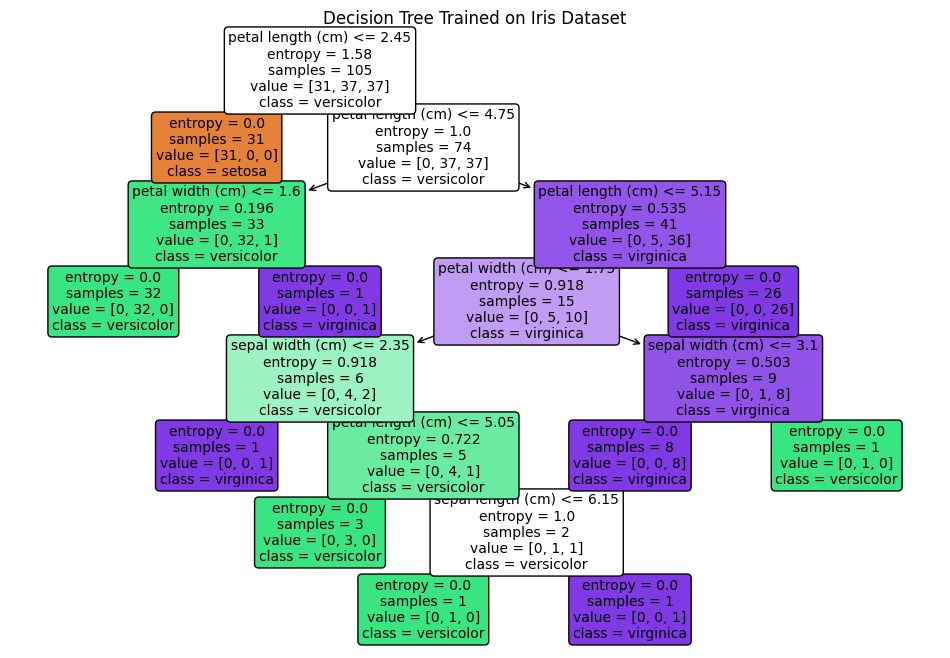

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset from sklearn
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
class_names = iris.target_names

print("Features:", feature_names)
print("Classes:", class_names)

# Split into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the classifier (using 'entropy' or 'gini' as criterion)
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Check accuracy on the test set
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {accuracy:.4f}")

plt.figure(figsize=(12, 8))

# plot_tree function automatically handles the drawing
plot_tree(clf,
          feature_names=feature_names,
          class_names=class_names,
          filled=True,
          rounded=True,
          fontsize=10)

plt.title("Decision Tree Trained on Iris Dataset")
plt.show()

# Question 4

## Support Vector Machines (SVM)


### 4.1 Theoretical

a) Is a **Support Vector Machine (SVM)** a supervised or unsupervised learning algorithm?  
Give a brief explanation.

b) What is a **margin** in SVM?  
Why does SVM aim to maximize the margin?

c) What are **support vectors**?  
Why are they important in defining the decision boundary?

d) What is the purpose of a **kernel function** in SVM?  
Name any two commonly used kernel functions.



a) SVM is a Supervised Learning algorithm.It requires a labeled dataset to train. The algorithm learns a mapping from input features to target labels (classes) by finding an optimal boundary that separates the known classes in the training data.

b) Margin: The margin is the perpendicular distance between the decision boundary (the separating hyperplane) and the closest data points from each class.

 SVM aims to find the widest street between the classes. Maximizing the margin improves the model's generalization ability. A wider margin acts as a safety buffer, it ensures that slight variations or noise in unseen test data are less likely to cross the boundary and be misclassified.

c) Support Vectors: These are the specific data points from the training set that lie closest to the decision boundary (hyperplane).
They are the pillars that hold up the decision boundary. The position and orientation of the optimal hyperplane depend entirely on these support vectors. If you were to remove all other non-support vector data points, the decision boundary would remain exactly the same. They are the critical elements that define the margin.

d) Purpose: The kernel function allows SVM to handle non-linearly separable data. It projects the original input data into a higher-dimensional space where a linear separation becomes possible. This is done efficiently using the kernel trick, which computes the relationships between points without explicitly transforming their coordinates.

Common Kernel Functions:

Radial Basis Function (RBF) / Gaussian Kernel (Most popular for non-linear data)

Polynomial Kernel

Linear Kernel

### 4.2 Conceptual

a) In a linearly separable dataset, how does SVM choose the **optimal separating hyperplane**?

b) What happens when the data is **not linearly separable**?  
Briefly explain how SVM handles this situation.

c) What is the role of the **regularization parameter `C`** in SVM?  
What happens when `C` is:
- Very large  
- Very small  


a)  SVM chooses the hyperplane that maximizes the margin. For a linearly separable dataset, there are infinitely many lines that can separate the classes. SVM selects the one that has the largest perpendicular distance (margin) to the nearest data points of both classes. This "widest street" ensures the decision boundary is robust and generalizes best to new, unseen data.

b) When data cannot be separated by a straight line, standard linear SVMs fail. SVM handles this using two main techniques:

Soft Margin (C parameter): It allows some misclassifications (points inside the margin or on the wrong side) to find a good enough linear separator that balances the margin width and classification errors.

The Kernel Trick: It projects the original 2D (or low-dimensional) data into a higher-dimensional space (e.g., 3D) where the classes become linearly separable. The SVM finds a linear plane in this high-dimensional space, which corresponds to a non-linear (curved) boundary when mapped back to the original space.

c)The parameter C controls the trade-off between maximizing the margin and minimizing training errors.

When C is Very Large (Strict):

Behavior: The model tries to classify every training point correctly. It imposes a high penalty for errors.

Result: A smaller margin and a more complex boundary.

Risk: High risk of overfitting (modeling noise in the data).

When C is Very Small (Lenient):

Behavior: The model allows more misclassifications to maintain a wider "street." It imposes a low penalty for errors.

Result: A wider margin and a simpler boundary.

Risk: High risk of underfitting (too simple to capture the pattern).